# Communication period optimization

## Imports

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Data

In [101]:
data = np.array([
    [7, 1, 155.87, 90.54],
    [7, 10, 101.86, 90.52],
    [7, 50, 96.17, 90.52],
    [7, 80, 95.31, 90.51],
    [7, 100, 95.15, 90.52],
    [7, 400, 94.04, 90.51],
    [31, 1, 83.53, 90.6],
    [31, 10, 31.90, 90.57],
    [31, 50, 27.57, 90.33],
    [31, 80, 26.95, 90.25],
    [31, 100, 26.86, 90.21],
    [31, 400, 25.75, 89.92],
    [63, 1, 70.65, 90.47],
    [63, 10, 21.62, 90.43],
    [63, 50, 17.79, 90.17],
    [63, 80, 17.70, 90.04],
    [63, 100, 17.52, 89.96],
    [63, 400, 17.09, 89.39],
    [127, 1, 101.92, 90.36],
    [127, 10, 16.09, 90.25],
    [127, 50, 11.39, 89.79],
    [127, 80, 10.78, 89.51],
    [127, 100, 10.74, 89.33],
    [127, 400, 10.25, 88.23],
    [215, 1, 141.42, 90.36],
    [215, 10, 15.96, 90.09],
    [215, 50, 9.18, 89.3],
    [215, 80, 8.38, 88.91],
    [215, 100, 8.25, 88.73],
    [215, 400, 7.70, 87.09],
    [99, 1, 81, 90.4],
    [99, 10, 17.4, 90.38],
    [99, 50, 13.04, 89.97],
    [99, 80, 12.5, 89.83],
    [99, 100, 12.85, 89.75],
    [99, 400, 12.25, 88.6],
    [199, 1, 135.14, 90.27],
    [199, 10, 15, 90.0],
    [199, 50, 8.86, 89.71],
    [199, 80, 8.80, 89.00],
    [199, 100, 8.5, 88.79],
    [199, 400, 8.3, 87.25]
])

In [102]:
results = pd.DataFrame(data, columns=["N_WORKERS", "COMM_PERIOD", "t(s)", "ACC(%)"])
results

,N_WORKERS,COMM_PERIOD,t(s),ACC(%)
0,7.0,1.0,155.87,90.54
1,7.0,10.0,101.86,90.52
2,7.0,50.0,96.17,90.52
3,7.0,80.0,95.31,90.51
4,7.0,100.0,95.15,90.52
5,7.0,400.0,94.04,90.51
6,31.0,1.0,83.53,90.60
7,31.0,10.0,31.90,90.57
8,31.0,50.0,27.57,90.33
9,31.0,80.0,26.95,90.25


In [103]:
time_pivot = results.pivot_table(values="t(s)", index="N_WORKERS", columns="COMM_PERIOD")
time_pivot

COMM_PERIOD,1.0,10.0,50.0,80.0,100.0,400.0
N_WORKERS,,,,,,
7.0,155.87,101.86,96.17,95.31,95.15,94.04
31.0,83.53,31.90,27.57,26.95,26.86,25.75
63.0,70.65,21.62,17.79,17.70,17.52,17.09
99.0,81.00,17.40,13.04,12.50,12.85,12.25
127.0,101.92,16.09,11.39,10.78,10.74,10.25
199.0,135.14,15.00,8.86,8.80,8.50,8.30
215.0,141.42,15.96,9.18,8.38,8.25,7.70


In [106]:
acc_pivot = results.pivot_table(values="ACC(%)", index="N_WORKERS", columns="COMM_PERIOD")
acc_pivot

COMM_PERIOD,1.0,10.0,50.0,80.0,100.0,400.0
N_WORKERS,,,,,,
7.0,90.54,90.52,90.52,90.51,90.52,90.51
31.0,90.60,90.57,90.33,90.25,90.21,89.92
63.0,90.47,90.43,90.17,90.04,89.96,89.39
99.0,90.40,90.38,89.97,89.83,89.75,88.60
127.0,90.36,90.25,89.79,89.51,89.33,88.23
199.0,90.27,90.00,89.71,89.00,88.79,87.25
215.0,90.36,90.09,89.30,88.91,88.73,87.09


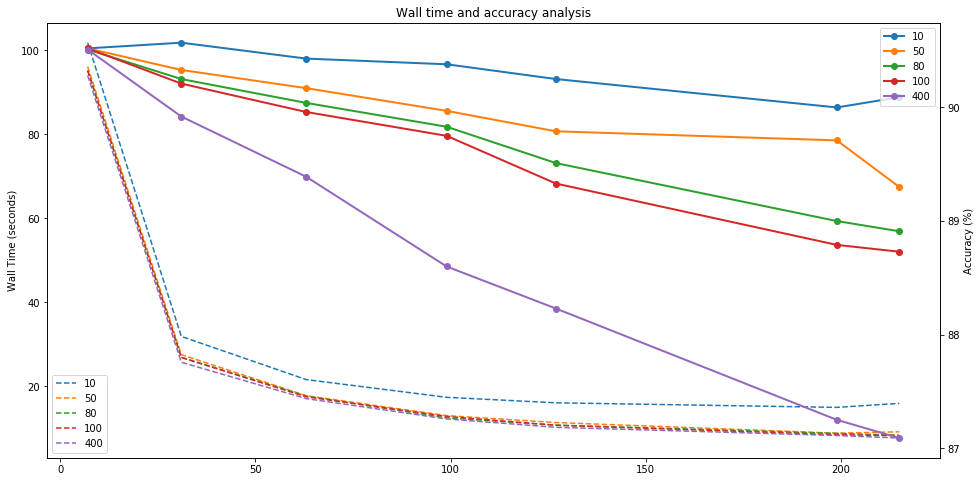

In [115]:
fig, ax1 = plt.subplots(figsize=(16, 8))
n_workers_list = [7, 31, 63, 99, 127, 199, 215]
n_comm_list = [10, 50, 80, 100, 400]
legend_loc1 = "lower left"
legend_loc2 = "upper right"
# ax1 = time_pivot.loc[[99, 127, 199, 215]].plot(kind="bar", figsize=(16, 8))
lines1 = ax1.plot(n_workers_list, time_pivot.loc[n_workers_list, n_comm_list].values, linestyle="--")
ax1.set_ylabel("Wall Time (seconds)")
ax2 = ax1.twinx()
lines2 = ax2.plot(n_workers_list, acc_pivot.loc[n_workers_list, n_comm_list].values, linestyle='-', marker='o', linewidth=2.0)
ax2.set_ylabel("Accuracy (%)")
ax2.yaxis.set_ticks(np.arange(87.0, 90.5, 1.0))
ax1.legend(lines1, n_comm_list, loc=legend_loc1)
ax2.legend(lines2, n_comm_list, loc=legend_loc2)
plt.title("Wall time and accuracy analysis");